In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

# Importing the dataset by giving the path and displaying first 10 values
placement= pd.read_csv(r"C:\Users\user\OneDrive\Desktop\ML work\University_placement\Placement_Data_Full_Class.csv")
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
# Remove leading and trailing spaces from column names
placement.columns = placement.columns.str.strip()

In [5]:
placement.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
#filling in the missing value in the salary column 
mean_value = placement['salary'].mean()
placement['salary'].fillna(mean_value, inplace=True)

In [7]:
column_to_drop = 'sl_no'
placement = placement.drop(column_to_drop, axis=1)

## Encoding and mapping the values

In [8]:
# Define a dictionary to replace values with True/False
mapping_dict = {'Placed': 1, 'Not Placed': 0}

# Replace values in a specific column
placement['status'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.000000


In [9]:
placement['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [10]:
# Define a dictionary to replace values with M(male)&F(female)
mapping_dict = {'M': 1, 'F': 2}

# Replace values in a specific column
placement['gender'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000.000000
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000.000000
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000.000000
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,288655.405405
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000.000000


In [11]:
# Define a dictionary to replace values with 1 & 0
mapping_dict = {'Yes': 1, 'No': 0}

# Replace values in a specific column
placement['workex'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


In [12]:
placement['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [13]:
# Define a dictionary to replace values with 1 & 2
mapping_dict = {'Mkt&Fin': 1, 'Mkt&HR': 2}

# Replace values in a specific column
placement['specialisation'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,2,58.80,1,270000.000000
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.000000
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1,250000.000000
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,2,59.43,0,288655.405405
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1,425000.000000


In [14]:
placement['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [15]:
# Define a dictionary to replace values with 5,6,7
mapping_dict = {'Comm&Mgmt': 5, 'Sci&Tech': 6,'Others':7}

# Replace values in a specific column
placement['degree_t'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,6,0,55.0,2,58.80,1,270000.000000
1,1,79.33,Central,78.33,Others,Science,77.48,6,1,86.5,1,66.28,1,200000.000000
2,1,65.00,Central,68.00,Central,Arts,64.00,5,0,75.0,1,57.80,1,250000.000000
3,1,56.00,Central,52.00,Central,Science,52.00,6,0,66.0,2,59.43,0,288655.405405
4,1,85.80,Central,73.60,Central,Commerce,73.30,5,0,96.8,1,55.50,1,425000.000000


In [16]:
placement['hsc_s'].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [17]:
# Define a dictionary to replace values with 5,6&7
mapping_dict = {'Commerce': 5, 'Science': 6,'Arts':7}

# Replace values in a specific column
placement['hsc_s'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,5,58.00,6,0,55.0,2,58.80,1,270000.000000
1,1,79.33,Central,78.33,Others,6,77.48,6,1,86.5,1,66.28,1,200000.000000
2,1,65.00,Central,68.00,Central,7,64.00,5,0,75.0,1,57.80,1,250000.000000
3,1,56.00,Central,52.00,Central,6,52.00,6,0,66.0,2,59.43,0,288655.405405
4,1,85.80,Central,73.60,Central,5,73.30,5,0,96.8,1,55.50,1,425000.000000


In [18]:
placement['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [19]:
# Define a dictionary to replace values with 2 &3
mapping_dict = {'Others': 2, 'Central':3}

# Replace values in a specific column
placement['hsc_b'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,2,5,58.00,6,0,55.0,2,58.80,1,270000.000000
1,1,79.33,Central,78.33,2,6,77.48,6,1,86.5,1,66.28,1,200000.000000
2,1,65.00,Central,68.00,3,7,64.00,5,0,75.0,1,57.80,1,250000.000000
3,1,56.00,Central,52.00,3,6,52.00,6,0,66.0,2,59.43,0,288655.405405
4,1,85.80,Central,73.60,3,5,73.30,5,0,96.8,1,55.50,1,425000.000000


In [20]:
placement['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

In [21]:
# Define a dictionary to replace values with 1 &2
mapping_dict = {'Central': 1, 'Others':2}

# Replace values in a specific column
placement['ssc_b'].replace(mapping_dict, inplace=True)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,2,91.00,2,5,58.00,6,0,55.0,2,58.80,1,270000.000000
1,1,79.33,1,78.33,2,6,77.48,6,1,86.5,1,66.28,1,200000.000000
2,1,65.00,1,68.00,3,7,64.00,5,0,75.0,1,57.80,1,250000.000000
3,1,56.00,1,52.00,3,6,52.00,6,0,66.0,2,59.43,0,288655.405405
4,1,85.80,1,73.60,3,5,73.30,5,0,96.8,1,55.50,1,425000.000000


In [22]:
placement.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

## Plot to show the the relation between variables

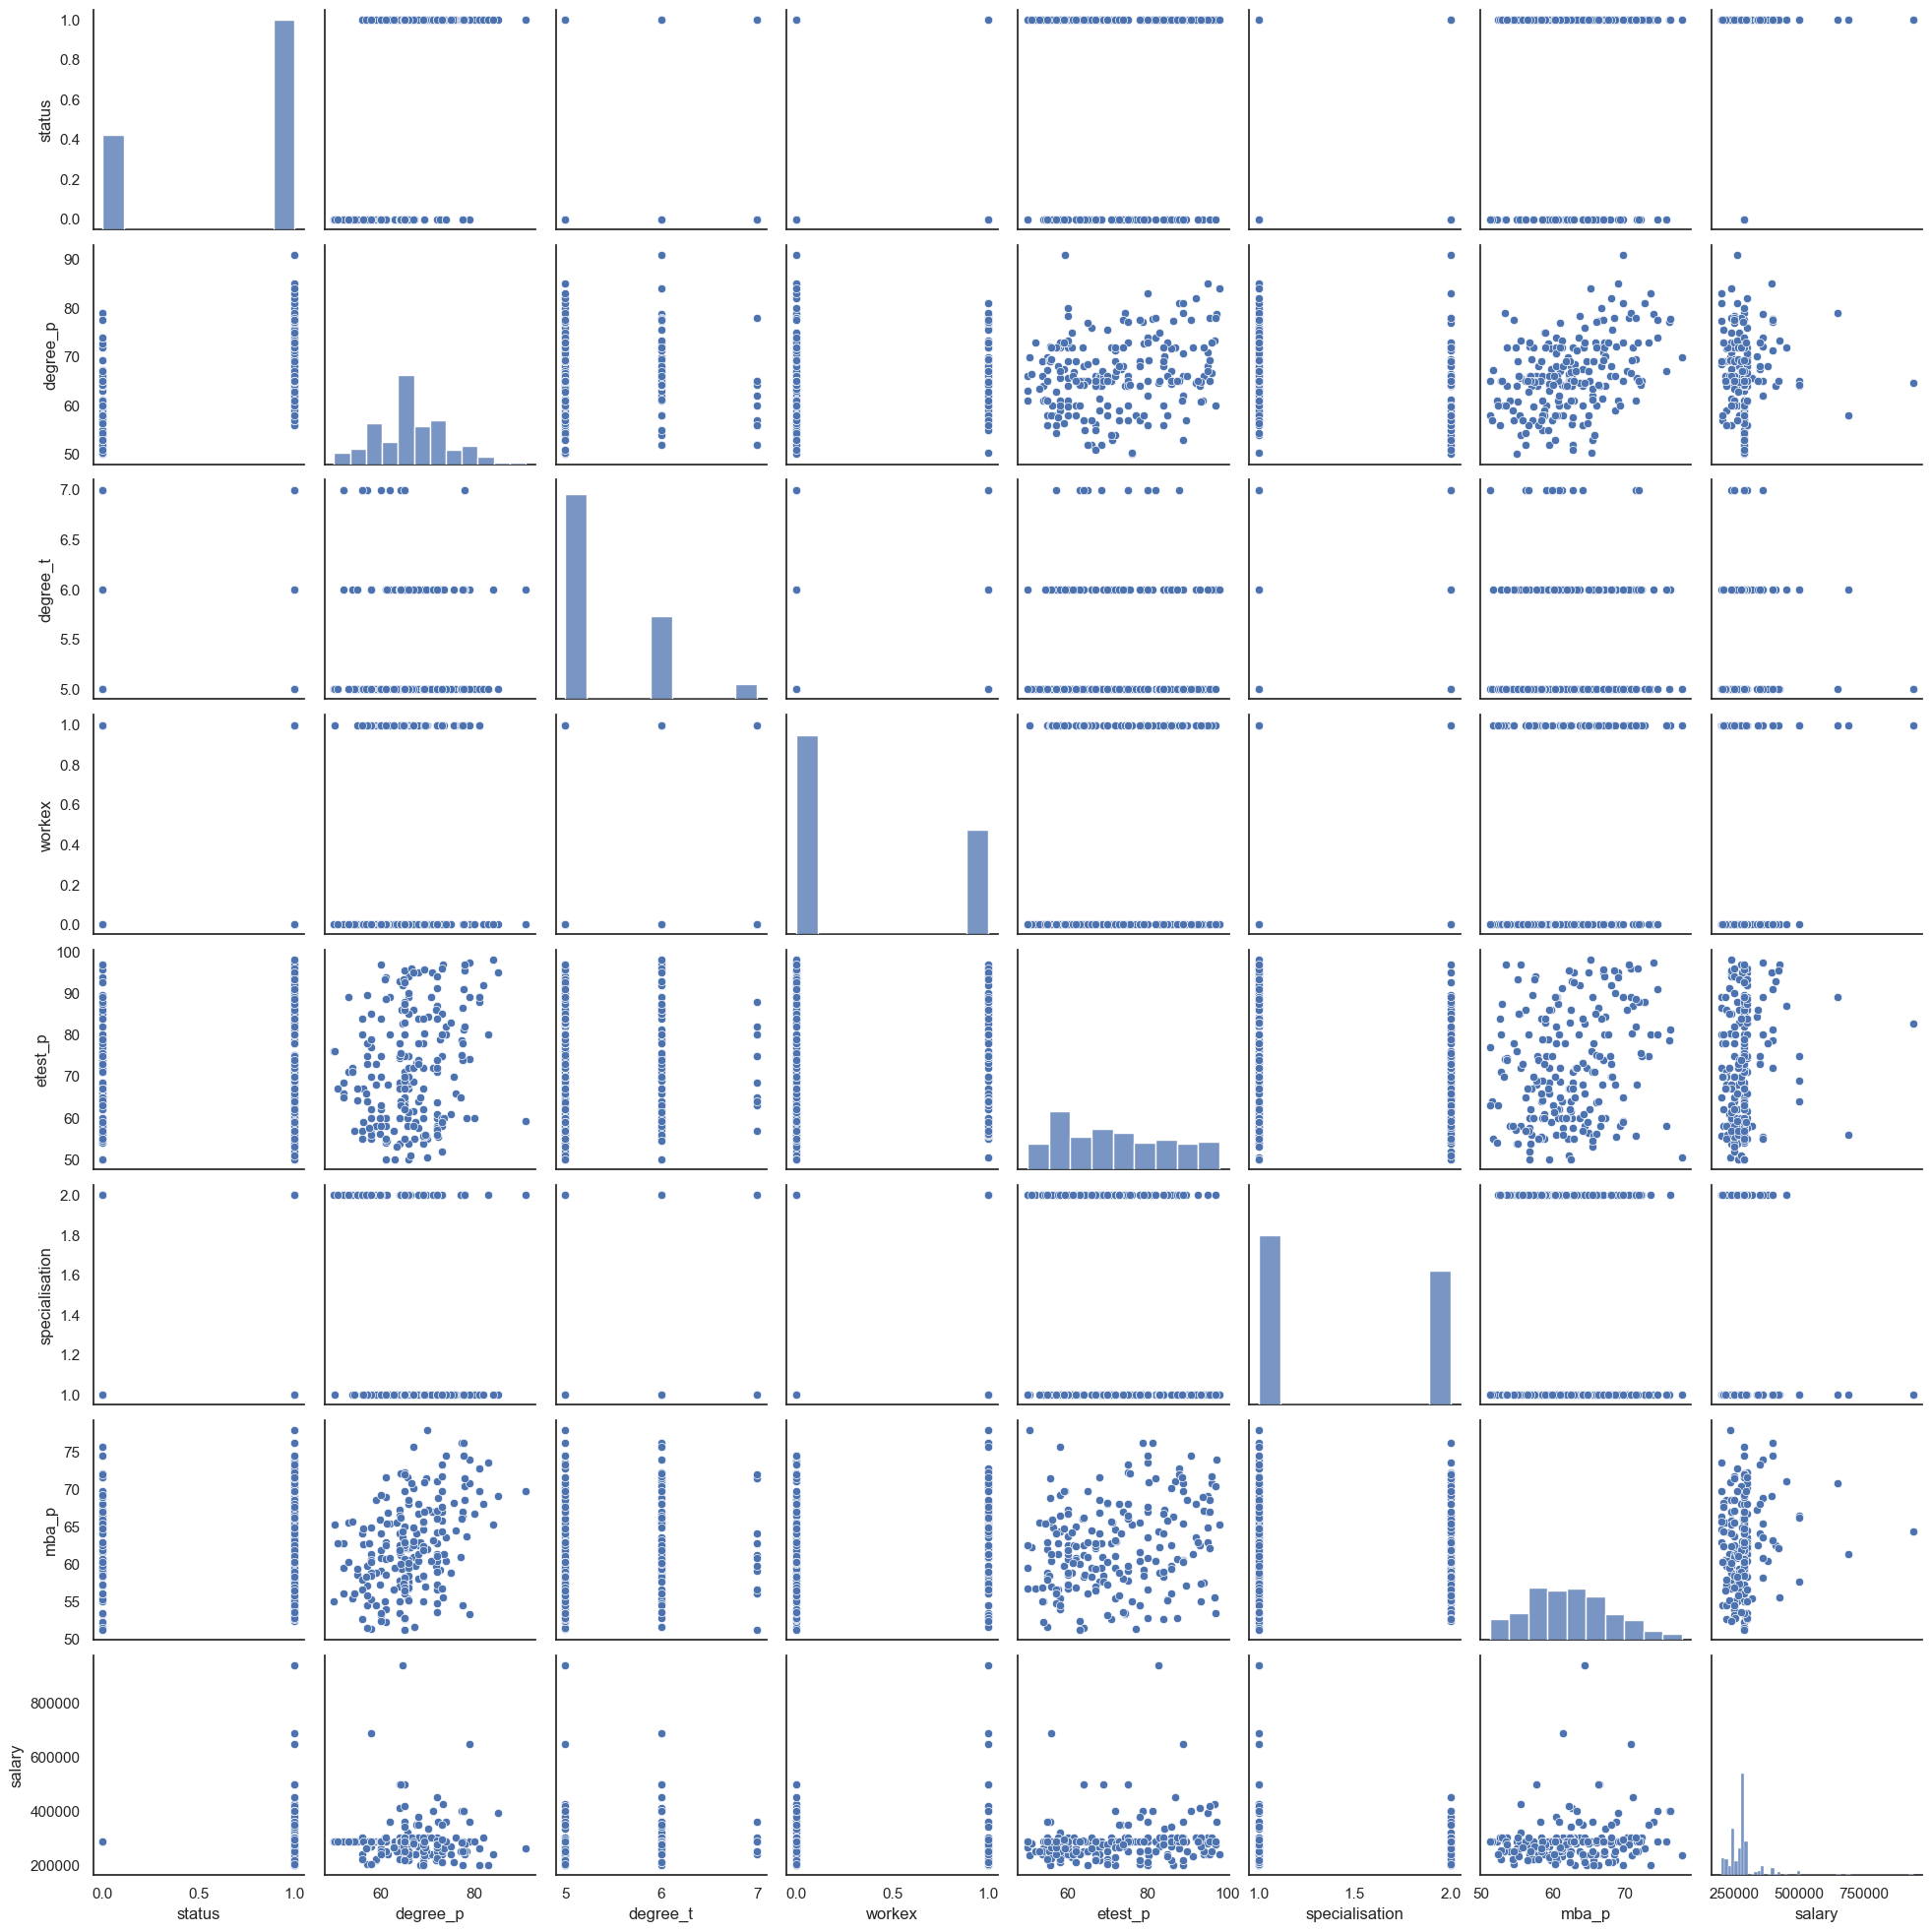

In [23]:
sns.pairplot(placement[['status','degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary']])
plt.show()

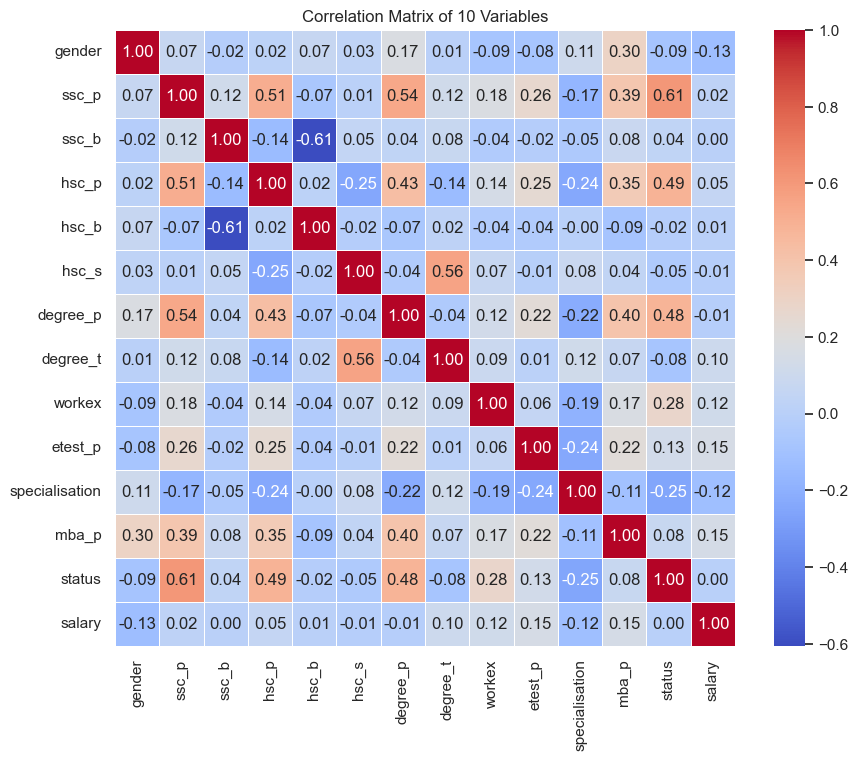

In [24]:
correlation_matrix = placement.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of 10 Variables')
plt.show()

## Training the model

In [25]:
x=placement[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p','salary']]
y=placement['status']

In [26]:
print(x.shape)
print(y.shape)

(215, 13)
(215,)


In [27]:
#splitting the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
y_train.unique()

array([0, 1], dtype=int64)

In [29]:
print(x_train.shape)
print(y_train.shape)

(172, 13)
(172,)


In [30]:
print(y_train.shape)
print(x_train.shape)

(172,)
(172, 13)


In [31]:
x_train.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary'],
      dtype='object')

## Logistic Regression

In [32]:
#Regularization
# Construct a pipeline with scaling and logistic regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

# Define hyperparameters for grid search
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'log_reg__penalty': ['l1', 'l2']  # Penalty term
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
# Print the best hyperparameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
accuracy = grid_search.score(x_test, y_test)
print("Test accuracy:", accuracy)

Best parameters: {'log_reg__C': 0.1, 'log_reg__penalty': 'l2'}
Test accuracy: 0.813953488372093


In [33]:
## training accuracy
print("training score:",grid_search.score(x_train,y_train))
print("Testing accuracy:",grid_search.score(x_test,y_test))

training score: 0.9011627906976745
Testing accuracy: 0.813953488372093


In [34]:
from sklearn import metrics
expected = y_test
predicted = grid_search.predict(x_test)

In [35]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



## Support vector machine

In [36]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC


# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Create SVC classifier
svc = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Get the best estimator
best_svc = grid_search.best_estimator_

# Fit the best estimator to the data
best_svc.fit(x_train, y_train)

# Evaluate the best model on the test set
accuracy = best_svc.score(X_test, y_test)
print("Accuracy on Test Set: {:.2f}".format(accuracy))


## Random forest algorithm

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Fit a Random Forest model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(x_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_rf_classifier.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9596638655462186
Test Accuracy: 0.9534883720930233


In [39]:
print( best_rf_classifier.score(x_train,y_train))
print( best_rf_classifier.score(x_test,y_test))

1.0
0.9534883720930233


In [40]:
from sklearn import metrics
expected = y_test
predicted = best_rf_classifier.predict(x_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.97      0.97      0.97        31

    accuracy                           0.95        43
   macro avg       0.94      0.94      0.94        43
weighted avg       0.95      0.95      0.95        43



## Decision Tree

In [41]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the parameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier()

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_dtree = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_dtree.score(x_test, y_test)
print("Accuracy on test set:", accuracy)

model.fit(x_train,y_train)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on test set: 0.9767441860465116


DecisionTreeClassifier()

In [42]:
print("Training score:",model.score(x_train,y_train))
print("Testing score:",model.score(x_test,y_test))

Training score: 1.0
Testing score: 0.9767441860465116


In [43]:
from sklearn import metrics
expected = y_test
predicted = model.predict(x_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        31

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



### X_GBOOST

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# Define the XGBoost classifier
xgb_model = XGBClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 3]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the entire training set
best_model.fit(x_train, y_train)

# Predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy: 0.9767441860465116


In [45]:
print("Training score:",best_model.score(x_train,y_train))
print("Testing score:",best_model.score(x_test,y_test))

Training score: 1.0
Testing score: 0.9767441860465116


## Precesion an Recall Curves of the algorithms performance

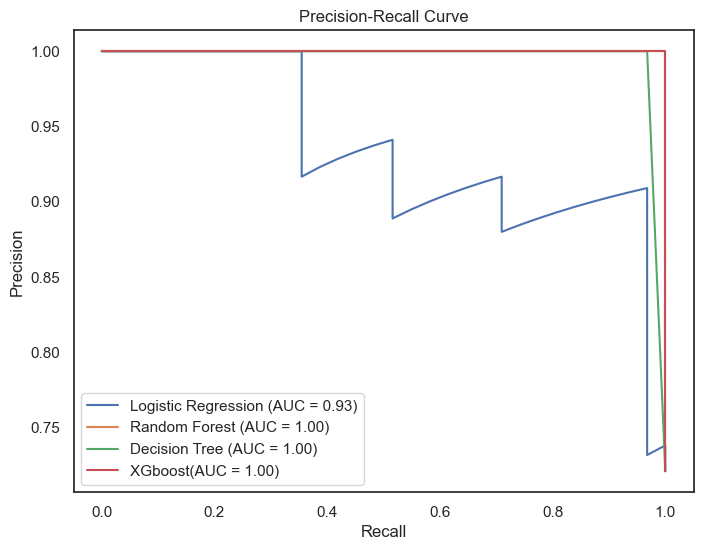

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Train your classifiers
classifier1 = LogisticRegression()
classifier2 = RandomForestClassifier()
# classifier3 = SVC()
classifier4 = DecisionTreeClassifier()
classifier5= XGBClassifier()

classifier1.fit(x_train, y_train)
classifier2.fit(x_train, y_train)
# classifier3.fit(x_train, y_train)
classifier4.fit(x_train, y_train)
classifier5.fit(x_train, y_train)

# Make predictions
y_pred_prob1 = classifier1.predict_proba(x_test)[:, 1]
y_pred_prob2 = classifier2.predict_proba(x_test)[:, 1]
# y_pred_prob3 = classifier3.decision_function(x_test)
y_pred_prob4 = classifier4.predict_proba(x_test)[:, 1]
y_pred_prob5 = classifier5.predict_proba(x_test)[:, 1]
# Calculate precision-recall curves and AUCs
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_prob1)
auc1 = auc(recall1, precision1)

precision2, recall2, _ = precision_recall_curve(y_test, y_pred_prob2)
auc2 = auc(recall2, precision2)

# precision3, recall3, _ = precision_recall_curve(y_test, y_pred_prob3)
# auc3 = auc(recall3, precision3)

precision4, recall4, _ = precision_recall_curve(y_test, y_pred_prob4)
auc4 = auc(recall4, precision4)

precision5, recall5, _ = precision_recall_curve(y_test, y_pred_prob5)
auc5 = auc(recall5, precision5)
# Plot precision-recall curves
plt.figure(figsize=(8, 6))

plt.plot(recall1, precision1, label=f'Logistic Regression (AUC = {auc1:.2f})')
plt.plot(recall2, precision2, label=f'Random Forest (AUC = {auc2:.2f})')
# plt.plot(recall3, precision3, label=f'Support Vector Machine (AUC = {auc3:.2f})')
plt.plot(recall4, precision4, label=f'Decision Tree (AUC = {auc4:.2f})')
plt.plot(recall5, precision5, label=f'XGboost(AUC = {auc5:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
